# **Fabian Munoz Aguirre A00354910**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
File_Path ="https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

# Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. 
This study reviewed the literature and used the following 23 variables as explanatory variables:

**X1**: Amount of the given credit (NT dollar): it includes both the individual  consumer credit and his/her family (supplementary) credit.

**X2**: Gender (1 = male; 2 = female).

**X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)

**X4**: Marital status (1 = married; 2 = single; 3 = others)

**X5**: Age (year)

**X6 - X11**: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

**X12-X17**: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

**X18-X23**: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients 

In [3]:
Read_data = pd.read_csv(File_Path, index_col=0)
df = Read_data.copy()
df.columns = ["LIMIT_BAL","GENDER","EDUCATION","MARRIAGE","AGE",
              "PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6",
              "BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6",
              "PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6",
              "DEFAULT"]

In [75]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,29999.0,1.603753,0.489125,1.0,1.00,2.0,2.00,2.0
EDUCATION,29998.0,1.853057,0.790320,0.0,1.00,2.0,2.00,6.0
MARRIAGE,29998.0,1.551903,0.521968,0.0,1.00,2.0,2.00,3.0
AGE,29995.0,35.484214,9.218024,21.0,28.00,34.0,41.00,79.0
PAY_1,29997.0,-0.016635,1.123829,-2.0,-1.00,0.0,0.00,8.0
PAY_2,29995.0,-0.133689,1.197254,-2.0,-1.00,0.0,0.00,8.0
PAY_3,29993.0,-0.166405,1.196048,-2.0,-1.00,0.0,0.00,8.0
PAY_4,29991.0,-0.220800,1.169153,-2.0,-1.00,0.0,0.00,8.0
PAY_5,29984.0,-0.266342,1.133296,-2.0,-1.00,0.0,0.00,8.0


Dada la descripcion del DataFrame se puede consultar el conteo de valores nulos. La tabla informativa abajo indica que en efecto, hay varios registros con valores nulos.

Para este ejercicio he decidido no lidiar con dichos registros y simplemente removerlos, al hacer esto solo pierdo un 1.4% del dataset.

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  int64  
 1   SEX        29999 non-null  float64
 2   EDUCATION  29998 non-null  float64
 3   MARRIAGE   29998 non-null  float64
 4   AGE        29995 non-null  float64
 5   PAY_1      29997 non-null  float64
 6   PAY_2      29995 non-null  float64
 7   PAY_3      29993 non-null  float64
 8   PAY_4      29991 non-null  float64
 9   PAY_5      29984 non-null  float64
 10  PAY_6      29986 non-null  float64
 11  BILL_AMT1  29989 non-null  float64
 12  BILL_AMT2  29989 non-null  float64
 13  BILL_AMT3  29987 non-null  float64
 14  BILL_AMT4  29985 non-null  float64
 15  BILL_AMT5  29983 non-null  float64
 16  BILL_AMT6  29990 non-null  float64
 17  PAY_AMT1   29992 non-null  float64
 18  PAY_AMT2   29991 non-null  float64
 19  PAY_AMT3   29992 non-null  float64
 20  PAY_AM

In [84]:
cleandf = df.dropna(axis=0)

In [85]:
cleandf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  29958 non-null  int64  
 1   SEX        29958 non-null  float64
 2   EDUCATION  29958 non-null  float64
 3   MARRIAGE   29958 non-null  float64
 4   AGE        29958 non-null  float64
 5   PAY_1      29958 non-null  float64
 6   PAY_2      29958 non-null  float64
 7   PAY_3      29958 non-null  float64
 8   PAY_4      29958 non-null  float64
 9   PAY_5      29958 non-null  float64
 10  PAY_6      29958 non-null  float64
 11  BILL_AMT1  29958 non-null  float64
 12  BILL_AMT2  29958 non-null  float64
 13  BILL_AMT3  29958 non-null  float64
 14  BILL_AMT4  29958 non-null  float64
 15  BILL_AMT5  29958 non-null  float64
 16  BILL_AMT6  29958 non-null  float64
 17  PAY_AMT1   29958 non-null  float64
 18  PAY_AMT2   29958 non-null  float64
 19  PAY_AMT3   29958 non-null  float64
 20  PAY_AM

# Outliers

Para representar graficamente los Outliers, usare los atributos cuantitativos discretos de LIMIT BALANCE y los BILL AMOUNT (6) que representan el balance total del credito y las seis observaciones de las cantidades de pago. De manera aleatoria, seleccione el atributo categorico de Genero para matizar los datos y representarlos en una grafica de dispersion.

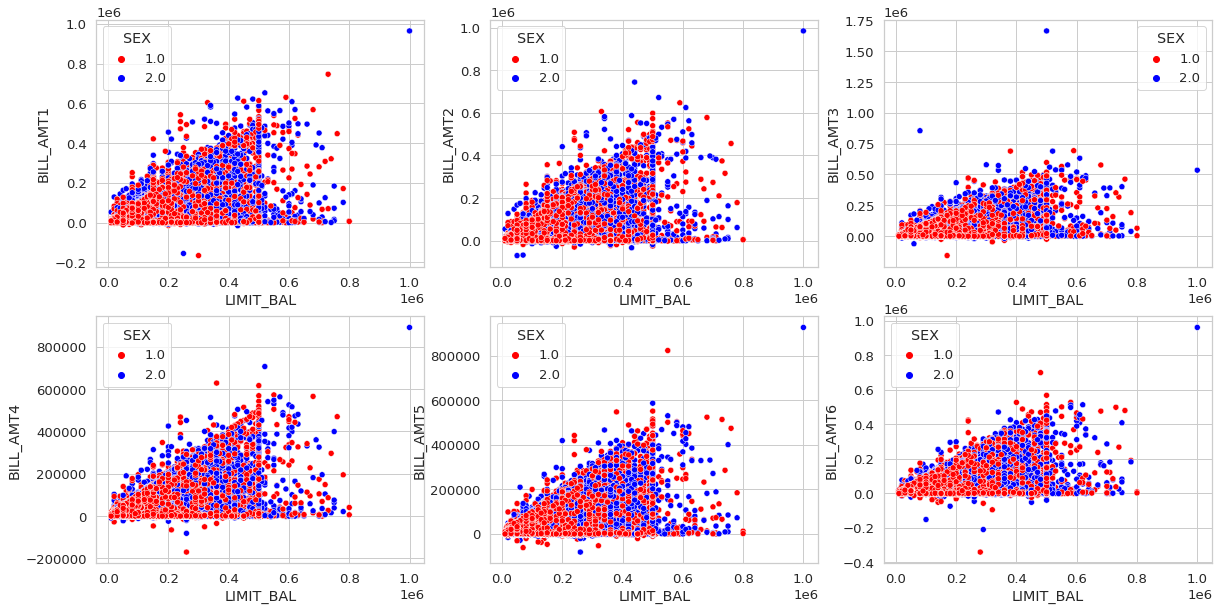

In [74]:
# 1 - Male
# 2 - Female
fig, ax = plt.subplots(2,3, figsize=(20,10))
sns.scatterplot(y="BILL_AMT1", x="LIMIT_BAL", hue="SEX", data=cleandf, ax=ax[0,0], palette=['red','blue'])
sns.scatterplot(y="BILL_AMT2", x="LIMIT_BAL", hue="SEX", data=cleandf, ax=ax[0,1], palette=['red','blue'])
sns.scatterplot(y="BILL_AMT3", x="LIMIT_BAL", hue="SEX", data=cleandf, ax=ax[0,2], palette=['red','blue'])
sns.scatterplot(y="BILL_AMT4", x="LIMIT_BAL", hue="SEX", data=cleandf, ax=ax[1,0], palette=['red','blue'])
sns.scatterplot(y="BILL_AMT5", x="LIMIT_BAL", hue="SEX", data=cleandf, ax=ax[1,1], palette=['red','blue'])
sns.scatterplot(y="BILL_AMT6", x="LIMIT_BAL", hue="SEX", data=cleandf, ax=ax[1,2], palette=['red','blue'])
plt.show()

# Boxplot

Luego de visualizar la dispersion del conjunto de datos en funcion del limite de credito, los pagos y el genero del acreedor, continuo profundizando el tema de outliers ahora para los conjuntos de datos cualitativos que representan los pagos al credito (Pay Amount) y los cargos al credito (bill amount). 

En las graficas abajo se puede facilmente observar que existen una serie de valores con una desviacion exagerada en el caso de los pagos.

Para el caso de los cargos al credito (BILL_AMT) tambien se observan valores elevados y muy alejados de los whiskers superiores. Al menos en este caso, son visibles al graficarlos a diferencia de los boxplot del PAY_AMT.

Agregare tambien boxplots para las variables categoricas usando el atributo del limite de credito para observar su variabilidad y el atributo de Default (la variable que se busca predecir) para matizar el diagrama.

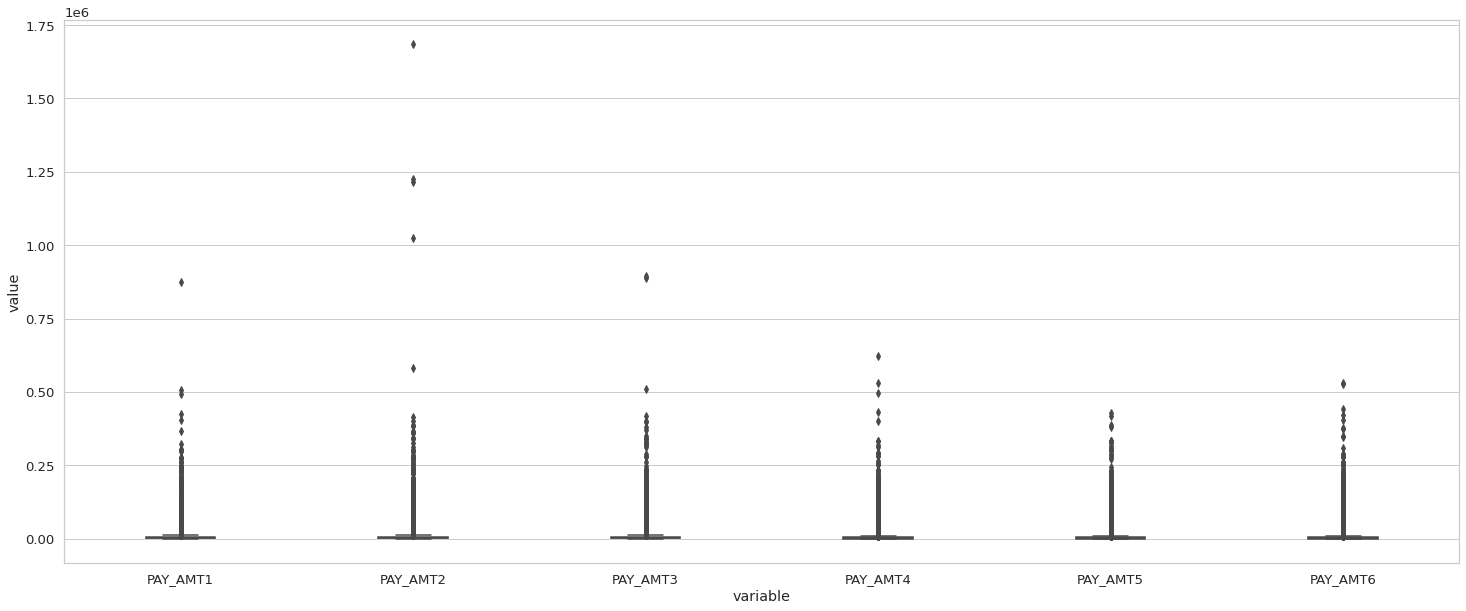

In [77]:
plt.figure(figsize=(25,10))
sns.boxplot(x="variable", y="value", data=pd.melt(cleandf[["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]]), width=0.3)
plt.show()

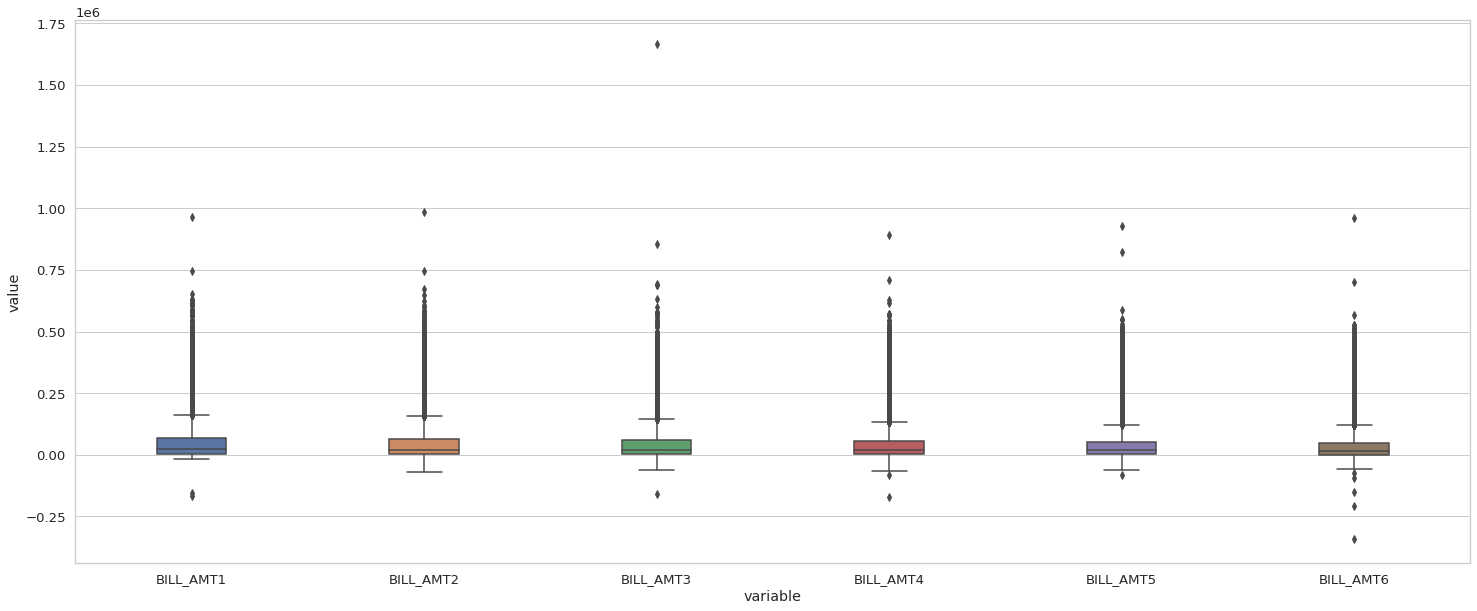

In [72]:
plt.figure(figsize=(25,10))
sns.boxplot(x="variable", y="value", data=pd.melt(cleandf[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3","BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]]), width=0.3)
plt.show()

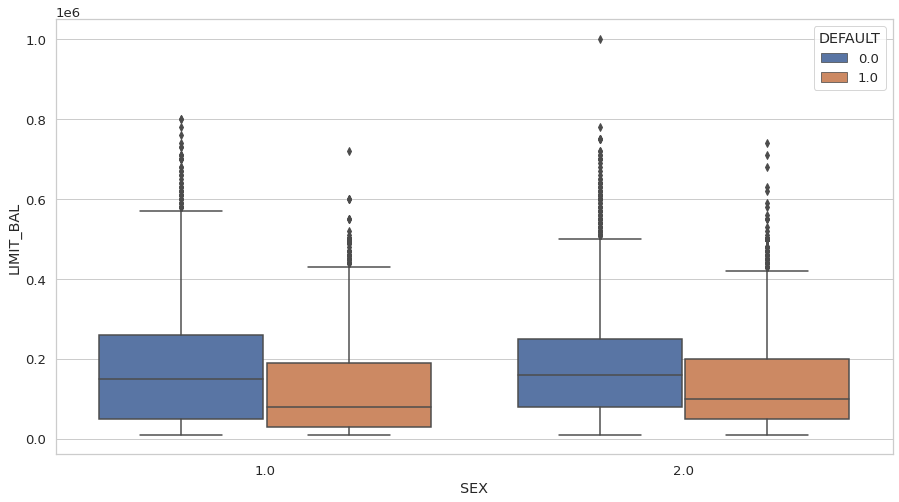

In [79]:
plt.figure(figsize=(15,8))
sns.boxplot(x="SEX", y="LIMIT_BAL", hue="DEFAULT", data=cleandf)

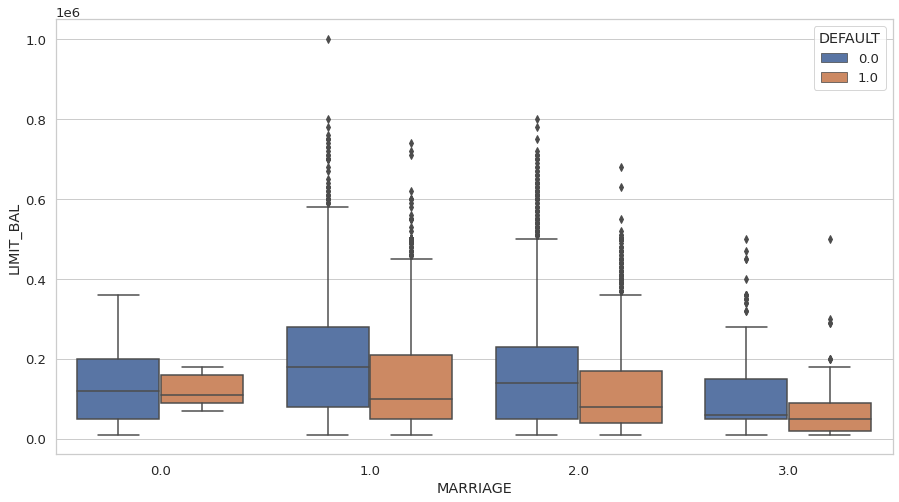

In [81]:
plt.figure(figsize=(15,8))
sns.boxplot(x="MARRIAGE", y="LIMIT_BAL", hue="DEFAULT", data=cleandf)

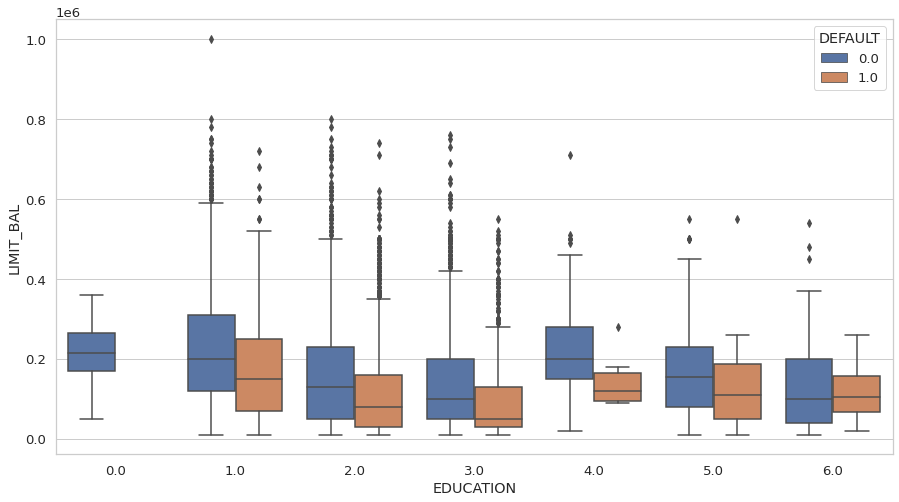

In [113]:
plt.figure(figsize=(15,8))
sns.boxplot(x="EDUCATION", y="LIMIT_BAL", hue="DEFAULT", data=cleandf)

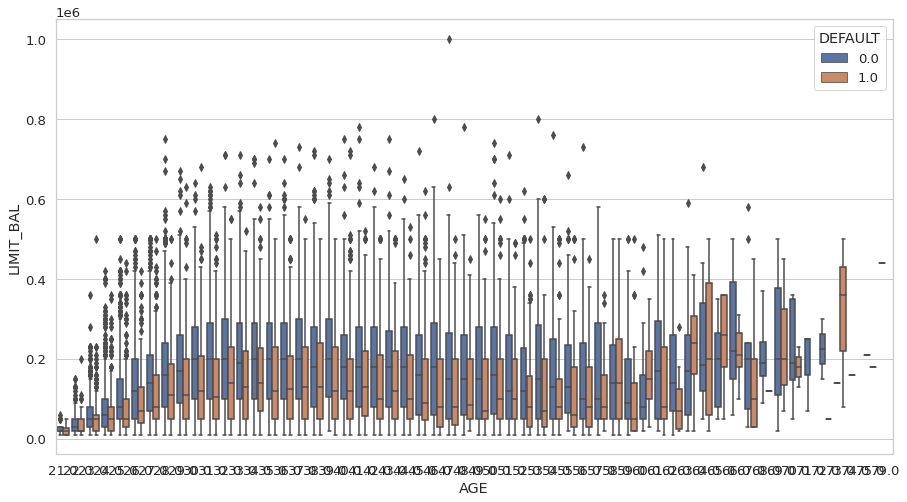

In [114]:
plt.figure(figsize=(15,8))
sns.boxplot(x="AGE", y="LIMIT_BAL", hue="DEFAULT", data=cleandf)

##Correlaciones

Los valores de correlacion son mediciones estadisticas para expresar la direccion y tamaño de relacion entre los atributos de un conjunto de datos.

Me fijaré en los valores altos sin importar su dirección para determinar redundancia de datos o simplemente datos que puedo quitar sin perder información que describa el conjunto.

La gráfica abajo ayuda a identificar que atributos se pueden remover del conjunto con la inteción de mejorar el desempeño de modelos de predicción.

Viendo que valores de correlación con la variable que se busca predecir y que están mas cerca del cero  reducí el conjunto a únicamente los siguintes atributos:

"LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE","AGE",

"BILL_AMT1","PAY_6", "PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"

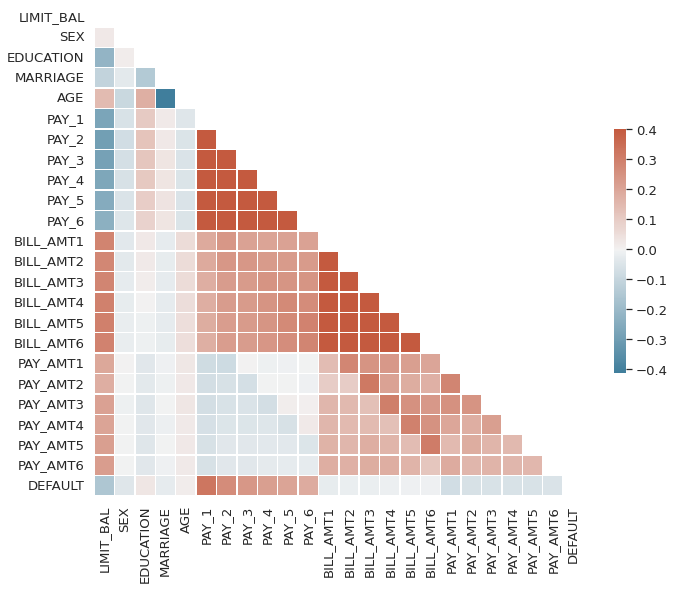

In [87]:
corr = cleandf.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.4, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

#Principal Component Analysis

Habiendo filtrado el conjunto de datos, continuo con la transformación usando un Standard Scaler y con esto remover de forma matemática los puntos que llevarian a variaciones no deseadas. No incluyo la variable a predecir en la transformación.

Los datos transformados los almaceno en un nuevoy dataframe y hago un PCA inicial para poder graficar la variación acumulada sobre los componentes principales. Esta gráfica me va a permitir saber decidir cuántos componentes principales usar dado un umbral de perdida. Voy a usar 95% dado que es un valor recomendado en la bibliografía encontrada en línea.

Valide que el número de componentes sea consistente, para esto utilicé un PCA configurando el parámetro **n_components a 0.95**

In [89]:
features = ["LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE","BILL_AMT1","PAY_6",
            "PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]

X = cleandf.loc[:, features].values
Y = cleandf.loc[:, ['DEFAULT']].values

X = StandardScaler().fit_transform(X)

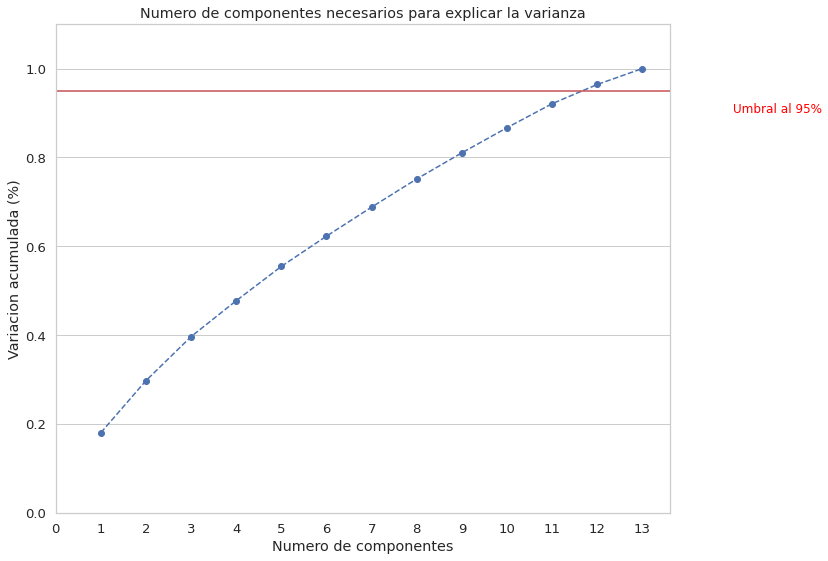

In [107]:
pca = PCA().fit(X)

plt.rcParams["figure.figsize"] = (11,9)

fig, ax = plt.subplots()
xi = np.arange(1, 14, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Numero de componentes')
plt.xticks(np.arange(0, 14, step=1))

plt.ylabel('Variacion acumulada (%)')
plt.title('Numero de componentes necesarios para explicar la varianza')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(15, 0.9, 'Umbral al 95%', color = 'red', fontsize=12)

ax.grid(axis='x')
plt.show()

In [93]:
pca095 = PCA(n_components = 0.95)
pca095.fit(X)
pca095.n_components_

12

In [94]:
new_pca = PCA(n_components = pca095.n_components_)
comps = new_pca.fit_transform(X)
new_pca_df = pd.DataFrame(data = comps, columns = ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12'])

In [112]:
pd.DataFrame(new_pca.components_,columns=features, index = ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12'])

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
PCA1,0.414287,-0.009706,-0.100098,-0.069751,0.103564,0.310233,-0.047957,0.366058,0.348732,0.365385,0.334119,0.314678,0.323019
PCA2,-0.061768,0.059386,-0.383184,0.631883,-0.651022,-0.042940,0.043515,0.066559,0.066313,0.061562,0.050373,0.044412,0.043109
PCA3,-0.363090,-0.158825,0.380106,0.092952,-0.056976,0.361513,0.722583,0.088745,0.066705,0.097055,0.103071,-0.031919,0.019221
PCA4,-0.302474,0.494736,0.359195,-0.048854,-0.076550,-0.447547,-0.122379,0.315895,0.385937,0.211402,0.075750,-0.068061,-0.086052
PCA5,-0.161325,-0.809425,-0.051410,0.092735,0.123168,-0.352120,-0.127930,0.196653,0.254828,0.156880,0.003840,-0.090137,-0.125210
PCA6,0.124179,0.131139,-0.436846,-0.190457,0.068541,0.039812,0.232074,0.137449,-0.020865,0.206499,0.248547,-0.669120,-0.329646
PCA7,-0.024166,-0.043155,0.098655,0.038945,-0.022390,-0.037968,-0.087462,0.150951,-0.102673,-0.081576,-0.120028,-0.547570,0.788980
PCA8,-0.064582,-0.074873,0.222310,0.085665,-0.041070,-0.138279,-0.174459,-0.253103,-0.340502,0.034373,0.835139,-0.017806,0.057101
PCA9,0.134830,-0.019351,0.323522,0.222263,-0.039620,0.218967,-0.263420,-0.109230,-0.279513,0.693992,-0.288581,-0.160154,-0.166915
PCA10,-0.209115,0.049129,-0.321005,-0.237006,0.050642,-0.328765,0.276278,-0.461252,-0.011191,0.493051,-0.079023,0.196773,0.326677


In [96]:
df_Y = pd.DataFrame(Y, columns = ["DEFAULT"])

In [97]:
final_df = pd.concat([new_pca_df,df_Y], axis =1)

In [98]:
final_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,DEFAULT
0,-1.290422,0.055216,-1.080310,1.192767,-0.424371,-0.244080,0.125379,0.248149,0.039502,0.086494,-0.022994,-1.580760,1.0
1,-1.171265,1.241548,1.329544,0.443314,-0.785171,0.298900,-0.052231,-0.194248,-0.361361,0.508799,-0.056735,0.331131,1.0
2,-0.865701,0.617104,0.247633,0.516781,-0.548701,-0.147041,0.181272,0.016671,0.055704,0.027295,0.043635,0.646918,0.0
3,-0.797765,-0.801840,0.251421,0.610687,-0.680362,0.290043,-0.081824,-0.196463,-0.338467,0.401984,-0.162088,-0.404899,0.0
4,0.146822,-2.160041,0.465368,0.393270,1.893352,0.369557,-0.278631,-0.134949,-0.710948,0.761539,0.702613,0.774680,0.0


In [99]:
new_pca.explained_variance_ratio_

array([0.18117868, 0.11705191, 0.09900867, 0.08073975, 0.0771798 ,
       0.06795091, 0.06529611, 0.06341324, 0.05868948, 0.0565063 ,
       0.05393743, 0.04322984])

# Interpretación del resultado

En la tabla abajo se puede ver que la proporción de varianca es mayor significativamente en PCA0 donde la variabilidad es de 18.11% y en PCA1 donde la variabilidad es de 11.70% Luego los valores de variabilidad van reduciéndose desde el 9.9% hasta el 4.32%

Finalmente se puede ver en el diagrama de Scree abajo que con los 12 componentes se tendría contabilizada el 97% de la variabilidad. Esto significa que **habiendo reducido el conjunto de datos de 24 a 12 columnas (la mitad)** **el nivel de pérdida es bajo**. Esto resulta de gran ventaja para el desempeño de los modelos de predicción.

In [100]:
pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(new_pca.explained_variance_),
                           'Proportion of variance': new_pca.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(new_pca.explained_variance_ratio_)}
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,1.534732,0.181179,0.181179
1,1.233582,0.117052,0.298231
2,1.134529,0.099009,0.397239
3,1.024525,0.080740,0.477979
4,1.001684,0.077180,0.555159
5,0.939889,0.067951,0.623110
6,0.921346,0.065296,0.688406
7,0.907965,0.063413,0.751819
8,0.873492,0.058689,0.810509
9,0.857092,0.056506,0.867015


In [101]:
pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

,0,1,2,3,4,5,6,7,8,9,10,11
Standard deviation,1.53,1.23,1.13,1.02,1.00,0.94,0.92,0.91,0.87,0.86,0.84,0.75
Proportion of variance,0.18,0.12,0.10,0.08,0.08,0.07,0.07,0.06,0.06,0.06,0.05,0.04
Cumulative proportion,0.18,0.30,0.40,0.48,0.56,0.62,0.69,0.75,0.81,0.87,0.92,0.96


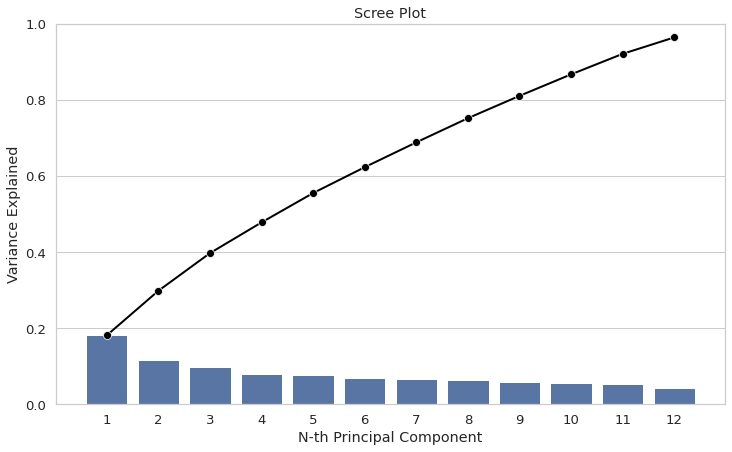

In [102]:
PC_components = np.arange(new_pca.n_components_) + 1

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(12, 7))

_ = sns.barplot(x = PC_components, 
                y = new_pca.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(new_pca.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

**1.- ¿Cuál es el número de componentes mínimo y por qué?**

*Eligiendo un umbral de varianza del 95%, el numero de PCAs es 15*


**2.- ¿Cuál es la variación de los datos que representan esos componentes?**

*PCA1 = 18%*

*PCA2 = 12%*

*Acumulando los PCAs del 3 al 12, la varianza es 67%*


**3.- ¿Cuál es la pérdida de información después de realizar PCA?**

*3%*


**4.- De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**

Mayor = LIM_BAL

Menor = PAY_AMT5


**5.- ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**

Cuando se necesita reducir la dimensionalidad de un conjunto de datos usando la técnica de filtrado por baja variabilidad donde las columnas poco cambio en sus valores llevan poca información y pueden ser removidas.